In [3]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
pickle_data = open(os.path.join(os.getcwd(), 'data', 'processed', 'clean_data.pickle'), 'rb')
data = pickle.load(pickle_data)

In [5]:
cols = data.columns[1:]

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[cols])
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=cols)
data_scaled.head()

,income_index,education_index,white_alone,rent_index,value_index,employed
geoid,,,,,,
48021950100,-0.312700,-0.986568,0.652318,-1.491379,-0.661901,1.226548
48021950200,-0.481692,-1.522989,-0.570963,-1.398232,-0.902080,0.795565
48021950300,-0.167987,-0.926236,0.317202,-1.221345,-0.485497,0.881334
48021950400,-0.260314,-0.456254,0.021801,-1.026959,-0.623461,1.235095
48021950600,-0.495846,-1.162868,0.831765,-1.444631,-0.791303,0.843208


In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scikitplot.metrics import plot_silhouette

wcss = []
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(data_scaled, kmeans.labels_))

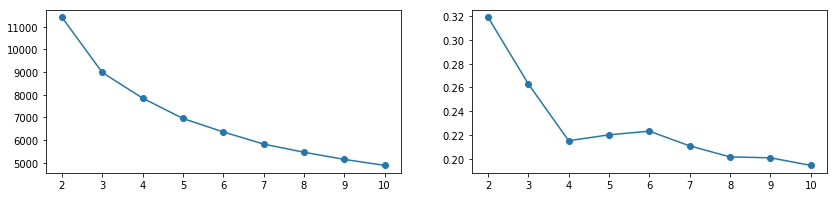

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

axes[0].plot(range(2, 11), wcss, marker='o')
axes[1].plot(range(2, 11), sil, marker='o')

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scaled)
clust_pred = kmeans.predict(data_scaled)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data_scaled)
print(pca.explained_variance_ratio_.cumsum())
data_pca = pca.transform(data_scaled)
data_pca = pd.DataFrame(data_pca, index=data.index, columns=['x', 'y'])
data_pca.head()

[ 0.59930976  0.73357137]


,x,y
geoid,,
48021950100,-0.928743,-1.527293
48021950200,-1.881843,-1.354525
48021950300,-0.860028,-1.146543
48021950400,-0.676169,-1.475143
48021950600,-1.177143,-1.215259


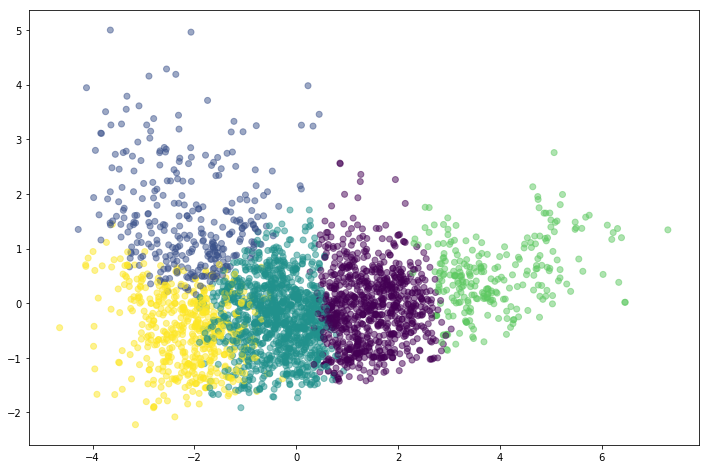

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.scatter(data_pca['x'], data_pca['y'], c=clust_pred, alpha=0.5)

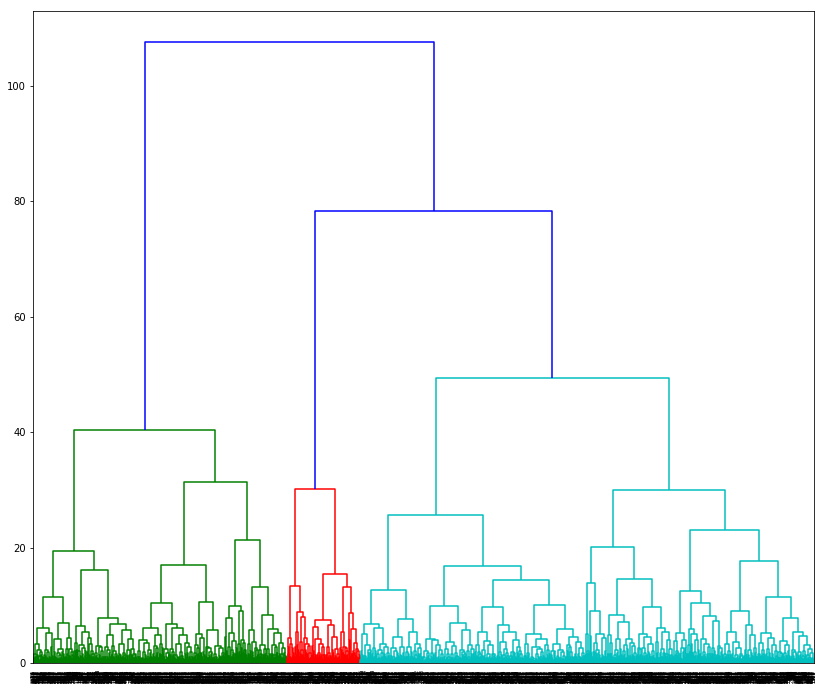

In [43]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(14, 12))

dend = dendrogram(linkage(data_scaled, method='ward'))

In [44]:
dend.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [45]:
dend['icoord']

[[15.0, 15.0, 25.0, 25.0],
 [5.0, 5.0, 20.0, 20.0],
 [65.0, 65.0, 75.0, 75.0],
 [55.0, 55.0, 70.0, 70.0],
 [45.0, 45.0, 62.5, 62.5],
 [35.0, 35.0, 53.75, 53.75],
 [12.5, 12.5, 44.375, 44.375],
 [95.0, 95.0, 105.0, 105.0],
 [125.0, 125.0, 135.0, 135.0],
 [115.0, 115.0, 130.0, 130.0],
 [100.0, 100.0, 122.5, 122.5],
 [85.0, 85.0, 111.25, 111.25],
 [28.4375, 28.4375, 98.125, 98.125],
 [145.0, 145.0, 155.0, 155.0],
 [165.0, 165.0, 175.0, 175.0],
 [185.0, 185.0, 195.0, 195.0],
 [205.0, 205.0, 215.0, 215.0],
 [190.0, 190.0, 210.0, 210.0],
 [170.0, 170.0, 200.0, 200.0],
 [150.0, 150.0, 185.0, 185.0],
 [265.0, 265.0, 275.0, 275.0],
 [255.0, 255.0, 270.0, 270.0],
 [245.0, 245.0, 262.5, 262.5],
 [235.0, 235.0, 253.75, 253.75],
 [225.0, 225.0, 244.375, 244.375],
 [285.0, 285.0, 295.0, 295.0],
 [305.0, 305.0, 315.0, 315.0],
 [290.0, 290.0, 310.0, 310.0],
 [234.6875, 234.6875, 300.0, 300.0],
 [325.0, 325.0, 335.0, 335.0],
 [355.0, 355.0, 365.0, 365.0],
 [345.0, 345.0, 360.0, 360.0],
 [375.0, 375.0, 